# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
# over 6 M data entries. Dont need that much
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data = data.sample(n=100000)

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
939133,43,CASH_IN,245619.33,C2025262284,13085659.95,13331279.29,C30974887,320591.40,74972.07,0,0
741011,38,PAYMENT,23301.01,C1526522231,47860.01,24559.00,M1435661390,0.00,0.00,0,0
2364737,190,CASH_OUT,91703.95,C889880594,0.00,0.00,C1872655009,313124.51,404828.45,0,0
542846,21,CASH_OUT,72265.85,C416216932,0.00,0.00,C1005387645,1031887.52,1104153.37,0,0
3290082,252,PAYMENT,31073.47,C150696805,21380.00,0.00,M1382097451,0.00,0.00,0,0


### What is the distribution of the outcome? 

In [6]:
# huge difference between fraud and not Fraud. Need to Re-sample. IN this case most likely over-sampling. 
data["isFraud"].value_counts()

0    99839
1      161
Name: isFraud, dtype: int64

<AxesSubplot:>

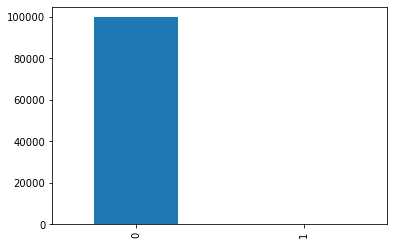

In [7]:
outcome_distribution = pd.value_counts(data['isFraud'])
outcome_distribution.plot(kind = 'bar')

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [8]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
data.drop(["nameOrig","nameDest","type"],axis=1,inplace=True)

In [10]:
data.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

---

* Min Max scaler

In [11]:
columns = list(data.columns)
print(columns)

['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [12]:
from sklearn.preprocessing import MinMaxScaler

# create normalization object from scikit learn package, and "fit" it to the features in hand -> calculating the min, max values in each column
data = MinMaxScaler().fit(data).transform(data)
data = pd.DataFrame(data, columns = columns)
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.057221,0.004561,0.391035,0.396615,0.001279,0.000300,0.0,0.0
1,0.050409,0.000433,0.001430,0.000731,0.000000,0.000000,0.0,0.0
2,0.257493,0.001703,0.000000,0.000000,0.001249,0.001618,0.0,0.0
3,0.027248,0.001342,0.000000,0.000000,0.004117,0.004412,0.0,0.0
4,0.341962,0.000577,0.000639,0.000000,0.000000,0.000000,0.0,0.0


* See which columns to drop or not

<AxesSubplot:>

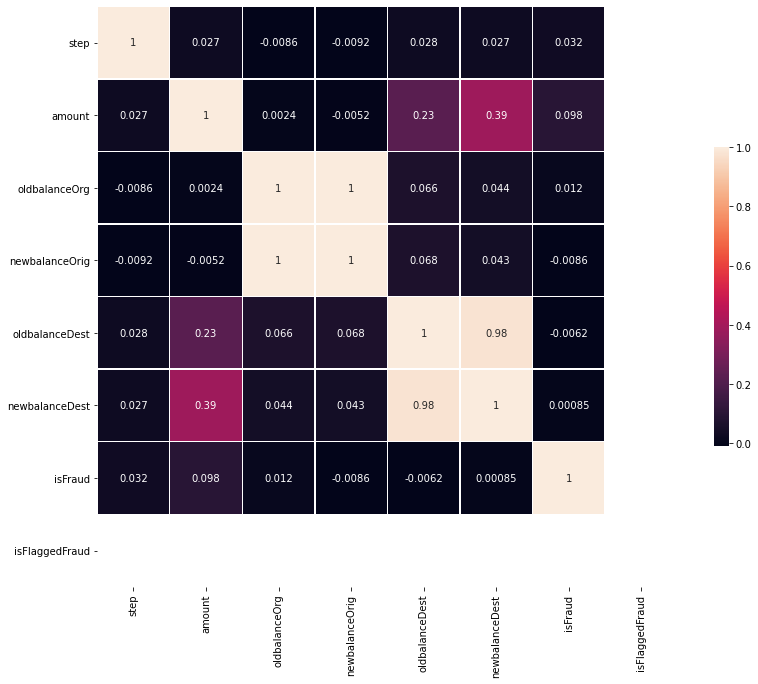

In [13]:
corr=data.corr()
fig, ax = plt.subplots(figsize = (13,11))
sns.heatmap(data.corr(), vmax=1, square=True, annot=corr, linewidths=0.5, cbar_kws={"shrink":0.5})

In [14]:
data.drop(["newbalanceOrig","newbalanceDest"],axis=1,inplace=True)

<AxesSubplot:>

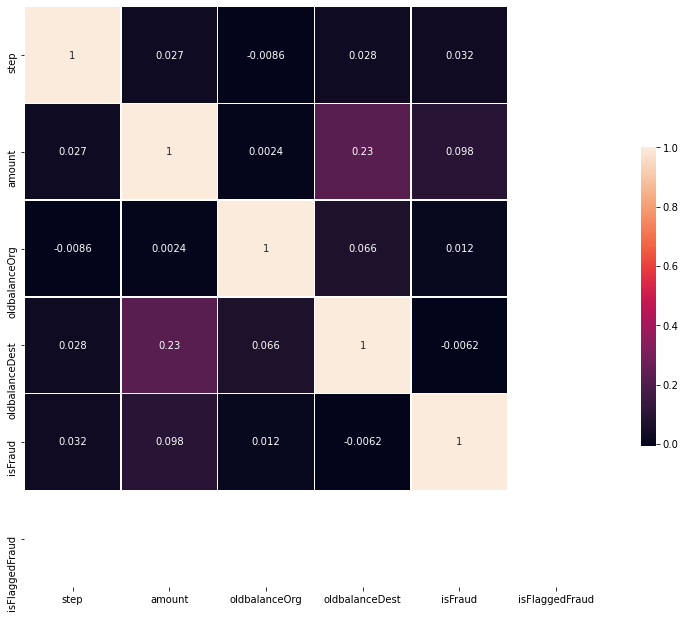

In [15]:
corr=data.corr()
fig, ax = plt.subplots(figsize = (13,11))
sns.heatmap(data.corr(), vmax=1, square=True, annot=corr, linewidths=0.5, cbar_kws={"shrink":0.5})

* Now We will up-sample

In [16]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [17]:
y = data["isFraud"]
X = data.drop(["isFraud"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [18]:
X = pd.concat([X_train,y_train],axis=1)
X.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFlaggedFraud,isFraud
75220,0.419619,0.000502,0.001761,0.000000,0.0,0.0
48955,0.212534,0.004230,0.047229,0.004141,0.0,0.0
44966,0.768392,0.002517,0.159295,0.000552,0.0,0.0
13568,0.480926,0.007075,0.000000,0.001926,0.0,0.0
92727,0.412807,0.003105,0.048992,0.043438,0.0,0.0


In [19]:
not_fraud = X[X["isFraud"]==0]
fraud = X[X["isFraud"]==1]

In [20]:
fraud_upsampled = resample(fraud, replace=True, n_samples=len(not_fraud),random_state=42)

In [21]:
new_data = pd.concat([fraud_upsampled,data])

In [22]:
new_data["isFraud"].value_counts()

0.0    99839
1.0    80030
Name: isFraud, dtype: int64

### Run a logisitc regression classifier and evaluate its accuracy.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
y = new_data["isFraud"]
X = new_data.drop(["isFraud"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [25]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [26]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [27]:
y_pred = model.predict(X_test)

In [28]:
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

0.7550453105020293
0.7543069599360644


In [30]:
from sklearn import metrics

In [31]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81     19987
         1.0       0.85      0.55      0.66     15987

    accuracy                           0.76     35974
   macro avg       0.78      0.73      0.74     35974
weighted avg       0.78      0.76      0.74     35974



### Now pick a model of your choice and evaluate its accuracy.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [33]:
y = new_data["isFraud"]
X = new_data.drop(["isFraud"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_predict = knn.predict(X_test)

In [36]:
a = y_predict - y_test
a.mean()

0.00038916995607939065

In [37]:
knn.score(X_test, y_test)

0.9993328515038639

In [38]:
knn.score(X_train, y_train)

0.9994092914972723

In [39]:
from sklearn import metrics

In [40]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19987
         1.0       1.00      1.00      1.00     15987

    accuracy                           1.00     35974
   macro avg       1.00      1.00      1.00     35974
weighted avg       1.00      1.00      1.00     35974



### Which model worked better and how do you know?

In [41]:
# KNN Shows a better score